### Data Creation

In [1]:
# cell magic functions :
#   `%%capture` blocks jupyter notebook output,
#   `%%script false --no-raise-error` avoid cell execution

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, timedelta #Date arithmetic
import mplfinance as mpf

#import PIL
#print('Pillow Version:', PIL.__version__)

# load and show an image with Pillow
from PIL import Image

import h5py
import os
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

import time

import gc  #Garbage collect

import multiprocessing as mp


# Below 4 lines needed to reload function definitions
import sys, importlib
from project_functions import *
importlib.reload(sys.modules['project_functions'])
from project_functions import *




2.2.0
Num GPUs Available:  1


In [2]:
#Without parse_date, date column is typed as Object
#df['date'] = df['date'].astype('datetime64')
#Also, could have used pd.to_datetime()
# Also : df.index.name = 'Date'
df = pd.read_csv("../data/asx_03Jul20.csv",parse_dates=[1]) #,index_col=1)
#print(df.head())


In [3]:
# Rename cols needed for next steps ?
df.columns = ['Symbol','Date','Open','High','Low','Close','Volume','Adjusted']
df = df[df['Close'] > 0]
#print(df.info())
max_date = df.index.max()

In [4]:
#Compute Growth and Target column
df['Close_Prev'] = df.groupby(['Symbol'])['Close'].shift(1)
df = df[df['Close_Prev'] > 0]
df['Target'] = (100 * ((df['Close']/df['Close_Prev']) - 1)).apply(setTargetLabel)
#df.groupby(['Target'])['Target'].count()


In [5]:
%%script false --no-raise-error

# Rows per symbols
df.groupby(['Symbol'])['Symbol'].count()


In [6]:
#df = df[df['Symbol']!='A2M.AX']

In [7]:
data_grouped = df.groupby('Symbol')
for name,group in data_grouped:    
    print(name + '  ' + str(group['Symbol'].count()))

A2M.AX  1331
AGL.AX  3917
ALL.AX  3917
ALQ.AX  3917
ALU.AX  3708
ALX.AX  2637
AMC.AX  3917
AMP.AX  3917
ANN.AX  3917
ANZ.AX  3917
APA.AX  3916
APT.AX  762
AST.AX  3676
ASX.AX  3917
AWC.AX  3917
AZJ.AX  2427
BEN.AX  3917
BHP.AX  3917
BLD.AX  3915
BOQ.AX  3917


In [8]:
%%script false --no-raise-error

#Loop through an array one batch at a time
syms = df['Symbol'].unique()
print(len(syms))
for i in range(0,len(syms),3):
    print(i)
    print(syms[i:i+3])



In [9]:
3900*17

66300

In [10]:
%%script false --no-raise-error

#Multiprocessing with batch of Symbols on Hard Disk [WORKING FINE]
start_time = time.time()

data = df[df['Symbol'].isin(['ALL.AX','ALQ.AX'])]
#data = df

syms = data['Symbol'].unique()

for i in range(0,len(syms),3):
    print(syms[i:i+3])
    start_time = time.time()
    data = df[df['Symbol'].isin(syms[i:i+3])]
    data_grouped = data.groupby('Symbol')
    #print(data_grouped['Symbol'].unique())
    result = applyParallel_groupby(data_grouped, createXYarrays)

    #print("Length of result = " +  str(len(result)))
    saveXYtoDisk(result,"Set" + str(i))
    print("--- %s seconds ---" % (time.time() - start_time))

#print(np.array(result).shape)
#--- 1407.3019680976868 seconds ---



In [11]:
#%%script false --no-raise-error

# Multiprocessing by splitting the data frame (one symbol at a time)
# Then using RAMDISK to create the temp image file (much faster)
# Uses applyParallel2()
# [WORKING FINE]

# [EARLIER] The Image.open was giving error as file names were getting overwritten. Also, even though there were 6 CPU core processes, all of them were generating the same random numbers. The solution is to pass the seed when the multiprocessing is called (not implemenented) 
# UnidentifiedImageError: cannot identify image file '/ramdisk/temp_imageA2M1990041346.png'

# Also, tried creating individual .PNG files with the aim of reading them later on. 

#data = df[df['Symbol'].isin(['A2M.AX','AGL.AX','ALL.AX','ALQ.AX'])]
#data = df[df['Symbol'].isin(['A2M.AX'])]
data = df
syms = data['Symbol'].unique()


CPU_CORES = mp.cpu_count()
for i in syms:
    print(i)
    start_time = time.time()
    temp = data[data['Symbol'] == i]    
    result = applyParallel_npsplit(np.array_split(temp,CPU_CORES), createXYarrays)
    gc.collect()
    gc.collect()
    saveXYtoDisk(result,"Set" + str(i))
    print("--- %s seconds ---" % (time.time() - start_time))





A2M.AX
Iter:0Iter:0Iter:0Iter:0Iter:0
Iter:0




Iter:100
Iter:100
Iter:100
Iter:100
Iter:100
Iter:100
SetA2M.AX
--- 65.36468315124512 seconds ---
AGL.AX
Iter:0Iter:0Iter:0Iter:0
Iter:0
Iter:0



Iter:100
Iter:100
Iter:100
Iter:100
Iter:100
Iter:100
Iter:200
Iter:200
Iter:200
Iter:200
Iter:200
Iter:200
Iter:300
Iter:300
Iter:300
Iter:300
Iter:300
Iter:300
Iter:400
Iter:400
Iter:400
Iter:400
Iter:400
Iter:400
Iter:500
Iter:500
Iter:500
Iter:500
Iter:500Iter:500

Iter:600
Iter:600
Iter:600
Iter:600
Iter:600
Iter:600
SetAGL.AX
--- 224.0548219680786 seconds ---
ALL.AX
Iter:0Iter:0Iter:0Iter:0Iter:0




Iter:0
Iter:100
Iter:100
Iter:100
Iter:100
Iter:100
Iter:100
Iter:200
Iter:200
Iter:200
Iter:200
Iter:200
Iter:200
Iter:300
Iter:300
Iter:300
Iter:300
Iter:300
Iter:300
Iter:400
Iter:400
Iter:400
Iter:400
Iter:400
Iter:400
Iter:500
Iter:500
Iter:500
Iter:500
Iter:500
Iter:500
Iter:600
Iter:600
Iter:600
Iter:600
Iter:600
Iter:600
SetALL.AX
--- 224.18503594398499 seconds ---
ALQ.AX
Iter:0Iter:

In [13]:
file = h5py.File("../data/SetA2M.AX.h5", "r")
set_x = file["set_x"][:]
set_y = file["set_y"][:]
file.close()

print(set_x.shape)
print(set_y.shape)


#Window 20 : (1151, 64, 64, 3)
print(1331/1151)
#Window 10 : (1211, 64, 64, 3)
print(1331/1211)


(1211, 64, 64, 3)
(1211,)
1.156385751520417
1.0990916597853013


### Test the created data files

In [ ]:
%%script false --no-raise-error

# Test Single file 
#file = h5py.File("data/Set0_128x128_Window20.h5", "r")
#file = h5py.File("data/Archive_256x256_Window20/SetA2M.AX.h5", "r")
file = h5py.File("data/Set0.h5", "r")
set_x = file["set_x"][:]
set_y = file["set_y"][:]
file.close()


print(set_x.shape)
print(set_y.shape)

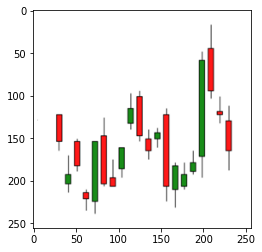

In [12]:
plt.imshow((set_x[1]).astype(np.uint8))

In [4]:
set_y[0:4]

array([0, 0, 1, 1])